In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1" # export OMP_NUM_THREADS=1
os.environ["OPENBLAS_NUM_THREADS"] = "1" # export OPENBLAS_NUM_THREADS=1
os.environ["MKL_NUM_THREADS"] = "1" # export MKL_NUM_THREADS=1
os.environ["VECLIB_MAXIMUM_THREADS"] = "1" # export VECLIB_MAXIMUM_THREADS=1
os.environ["NUMEXPR_NUM_THREADS"] = "1" # export NUMEXPR_NUM_THREADS=1
os.environ["CUDA_VISIBLE_DEVICES"]= '3'

import numpy as np
import matplotlib.pyplot as plt
import multielec_src.fitting as fitting
import multiprocessing as mp
import statsmodels.api as sm
from copy import deepcopy, copy

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
def sample_spikes(p_true, t):
    p_true, t = np.array(p_true), np.array(t).astype(int)
    
    p_empirical = []
    for i in range(len(p_true)):
        if t[i] == 0:
            p_empirical += [0.5]
        
        else:
            p_empirical += [np.mean(np.random.choice(np.array([0, 1]), 
                                                 p=np.array([1-p_true[i], p_true[i]]), 
                                                 size=t[i]))]
        
    p_empirical_array = np.array(p_empirical)

    return p_empirical_array

In [3]:
def sample_spikes_array(true_probs, trials, NUM_THREADS=24):

    input_list = []
    for i in range(len(true_probs)):
        for j in range(len(true_probs[i])):
            input_list += [(true_probs[i][j], trials[j])]
            
    pool = mp.Pool(processes=NUM_THREADS)
    results = pool.starmap_async(sample_spikes, input_list)
    mp_output = results.get()
    pool.close()

    return np.array(mp_output).reshape(true_probs.shape)
    

In [4]:
def get_performance_array(true_params, curr_probs, true_probs):
    
    error = 0
    cnt = 0
    for i in range(len(true_params)):
        for j in range(len(true_params[i])):
            if type(true_params[i][j]) != int:
                error += np.sqrt(np.sum((curr_probs[i][j] - true_probs[i][j])**2) / len(true_probs[i][j]))
                cnt += 1

    return error / cnt

In [5]:
DATASET = "2020-10-18-0"
params_true = np.load(f'params_true_{DATASET}_1elec.npy', allow_pickle=True)

NUM_CELLS = params_true.shape[0]
NUM_PATTERNS = params_true.shape[1]

In [6]:
ms = [1]

amps_scan = np.array([np.linspace(0, 4, 41).reshape(-1, 1)] * NUM_PATTERNS)

probs_true_scan = np.zeros((NUM_CELLS, NUM_PATTERNS, amps_scan.shape[1]))

for i in range(len(probs_true_scan)):
    for j in range(len(probs_true_scan[i])):
        if type(params_true[i][j]) != int:
            probs_true_scan[i][j] = fitting.sigmoidND_nonlinear(
                                    sm.add_constant(amps_scan[j], has_constant='add'), 
                                    params_true[i][j])
        else:
            probs_true_scan[i][j] = np.zeros(amps_scan.shape[1])

[[-9.00314507  6.15971845]]


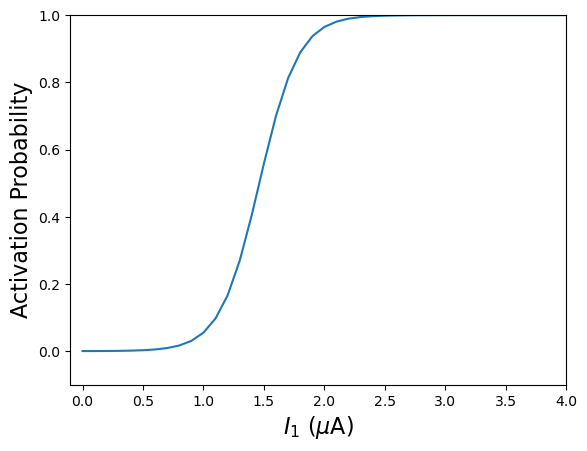

KeyboardInterrupt: Interrupted by user

In [7]:
# CHECK DATASET IF NEEDED

for i in range(len(probs_true_scan)):
    for j in range(len(probs_true_scan[i])):
        if type(params_true[i][j]) != int:

            print(params_true[i][j])
            
            fig = plt.figure(0)
            plt.xlabel(r'$I_1$ ($\mu$A)', fontsize=16)
            plt.ylabel('Activation Probability', fontsize=16)
            plt.xlim(-0.1, 4)
            plt.ylim(-0.1, 1)
            plt.plot(amps_scan[j][:, 0], probs_true_scan[i][j])
            plt.show()

            input()

Setting up data...
Generating input list...
Fitting dataset...
Calculating Jacobian...
Optimizing trials...
0
(DeviceArray(2136.5498, dtype=float32), DeviceArray(17842.51, dtype=float32), DeviceArray(2253.11, dtype=float32), DeviceArray(116.56027, dtype=float32))
1
(DeviceArray(2115.206, dtype=float32), DeviceArray(17788.668, dtype=float32), DeviceArray(2225.7832, dtype=float32), DeviceArray(110.577095, dtype=float32))
2
(DeviceArray(2079.3804, dtype=float32), DeviceArray(17369.799, dtype=float32), DeviceArray(2143.4106, dtype=float32), DeviceArray(64.03021, dtype=float32))
3
(DeviceArray(2084.5237, dtype=float32), DeviceArray(16798.197, dtype=float32), DeviceArray(2085.0347, dtype=float32), DeviceArray(0.51091516, dtype=float32))
4
(DeviceArray(2047.4053, dtype=float32), DeviceArray(16499.42, dtype=float32), DeviceArray(2080.096, dtype=float32), DeviceArray(32.690754, dtype=float32))
5
(DeviceArray(2019.1948, dtype=float32), DeviceArray(16488.121, dtype=float32), DeviceArray(2053.141,

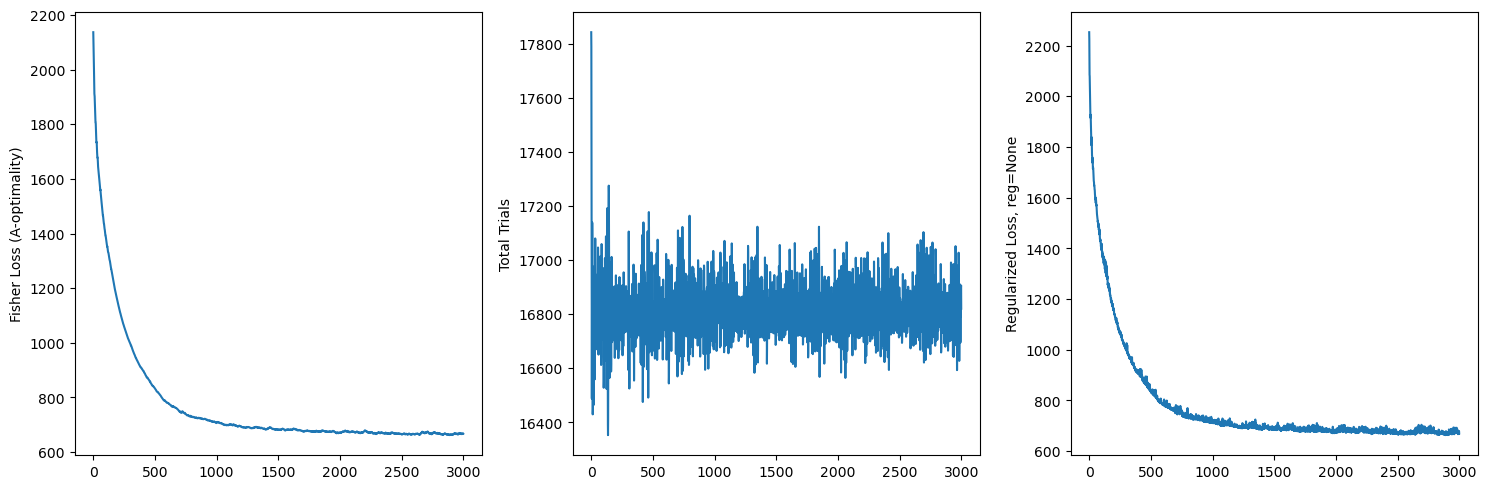

0.05898195132221184 0.05898195132221184


/tmp/ipykernel_1403/2971187439.py:118: RuntimeWarning: invalid value encountered in true_divide
  p_tmp = (p_new * T_new[np.newaxis, :, :] + probs_empirical * T_prev[np.newaxis, :, :]) / ((T_new + T_prev)[np.newaxis, :, :])


Setting up data...
Generating input list...
Fitting dataset...
Calculating Jacobian...
Optimizing trials...
0
(DeviceArray(810.7908, dtype=float32), DeviceArray(17842.51, dtype=float32), DeviceArray(853.8532, dtype=float32), DeviceArray(43.062458, dtype=float32))
1
(DeviceArray(800.89746, dtype=float32), DeviceArray(17789.23, dtype=float32), DeviceArray(841.7726, dtype=float32), DeviceArray(40.875103, dtype=float32))
2
(DeviceArray(792.1035, dtype=float32), DeviceArray(17371.164, dtype=float32), DeviceArray(815.8151, dtype=float32), DeviceArray(23.711605, dtype=float32))
3
(DeviceArray(784.6649, dtype=float32), DeviceArray(16800.395, dtype=float32), DeviceArray(784.9439, dtype=float32), DeviceArray(0.27896196, dtype=float32))
4
(DeviceArray(776.6433, dtype=float32), DeviceArray(16501.926, dtype=float32), DeviceArray(788.6178, dtype=float32), DeviceArray(11.974516, dtype=float32))
5
(DeviceArray(768.7149, dtype=float32), DeviceArray(16491.094, dtype=float32), DeviceArray(781.13416, dtyp

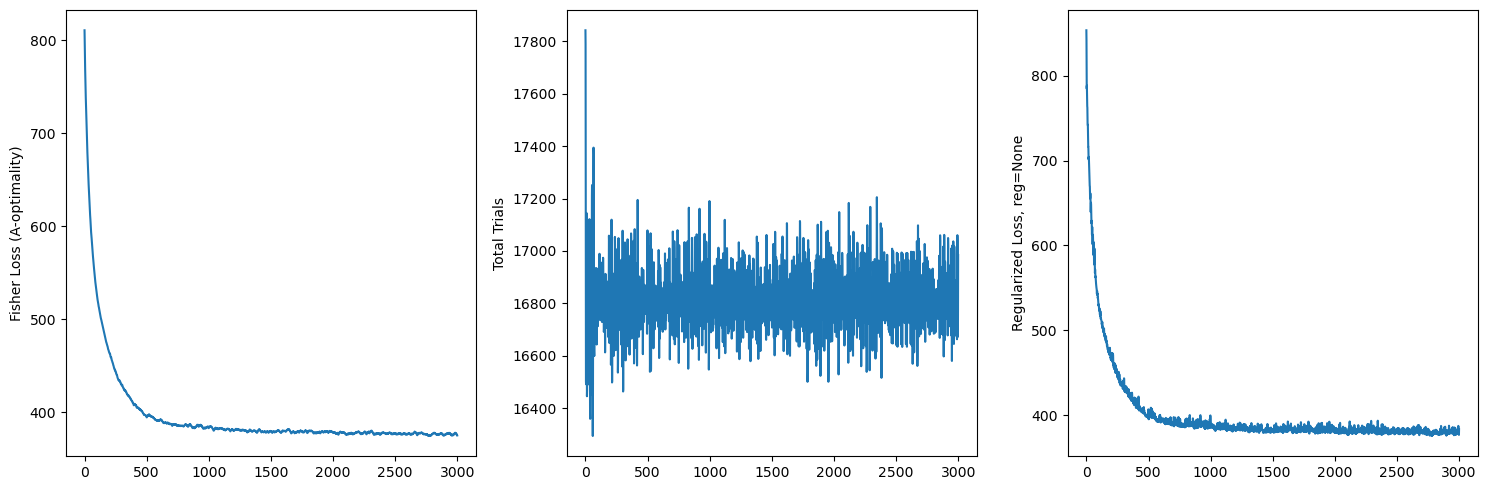

0.02899690094960639 0.04224740673825504


/tmp/ipykernel_1403/2971187439.py:118: RuntimeWarning: invalid value encountered in true_divide
  p_tmp = (p_new * T_new[np.newaxis, :, :] + probs_empirical * T_prev[np.newaxis, :, :]) / ((T_new + T_prev)[np.newaxis, :, :])


Setting up data...
Generating input list...
Fitting dataset...
Calculating Jacobian...
Optimizing trials...
0
(DeviceArray(458.45746, dtype=float32), DeviceArray(17842.508, dtype=float32), DeviceArray(482.72266, dtype=float32), DeviceArray(24.265203, dtype=float32))
1
(DeviceArray(454.34225, dtype=float32), DeviceArray(17789.027, dtype=float32), DeviceArray(477.37024, dtype=float32), DeviceArray(23.027998, dtype=float32))
2
(DeviceArray(450.31824, dtype=float32), DeviceArray(17369.229, dtype=float32), DeviceArray(463.6347, dtype=float32), DeviceArray(13.316467, dtype=float32))
3
(DeviceArray(446.3767, dtype=float32), DeviceArray(16796.502, dtype=float32), DeviceArray(446.44385, dtype=float32), DeviceArray(0.06714216, dtype=float32))
4
(DeviceArray(442.51886, dtype=float32), DeviceArray(16497.96, dtype=float32), DeviceArray(449.3581, dtype=float32), DeviceArray(6.8392377, dtype=float32))
5
(DeviceArray(438.7387, dtype=float32), DeviceArray(16487.158, dtype=float32), DeviceArray(445.8278

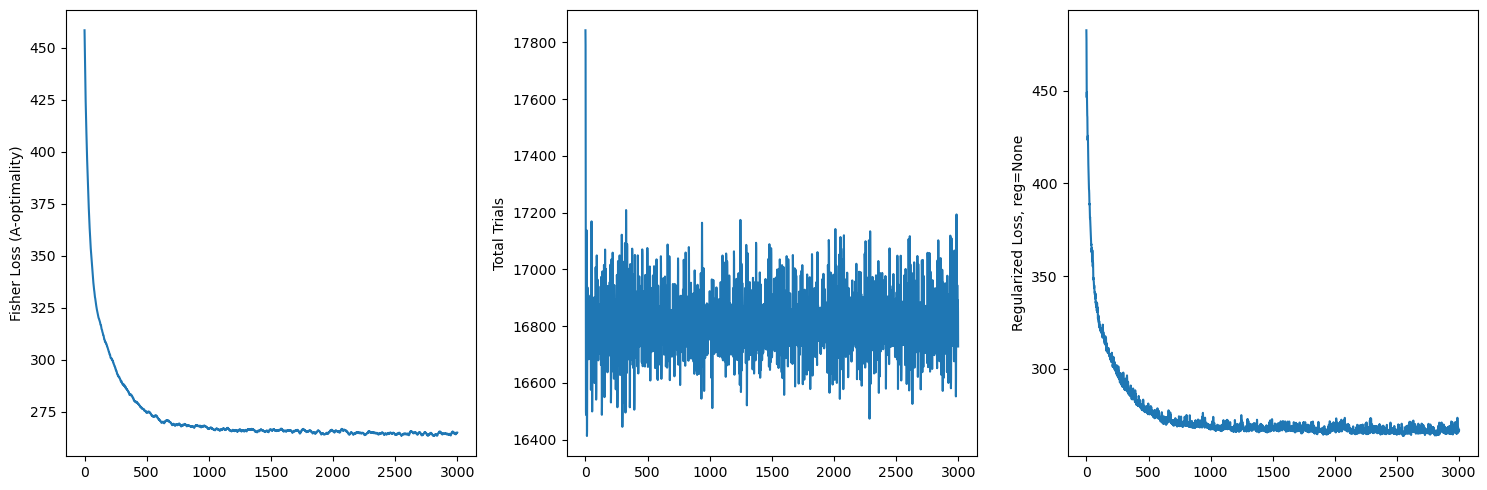

0.022454092766407883 0.034862817887655016


/tmp/ipykernel_1403/2971187439.py:118: RuntimeWarning: invalid value encountered in true_divide
  p_tmp = (p_new * T_new[np.newaxis, :, :] + probs_empirical * T_prev[np.newaxis, :, :]) / ((T_new + T_prev)[np.newaxis, :, :])


Setting up data...
Generating input list...
Fitting dataset...
Calculating Jacobian...
Optimizing trials...
0
(DeviceArray(303.55545, dtype=float32), DeviceArray(17842.508, dtype=float32), DeviceArray(319.55814, dtype=float32), DeviceArray(16.002699, dtype=float32))
1
(DeviceArray(302.00635, dtype=float32), DeviceArray(17789.943, dtype=float32), DeviceArray(317.2071, dtype=float32), DeviceArray(15.200748, dtype=float32))
2
(DeviceArray(300.4787, dtype=float32), DeviceArray(17371.438, dtype=float32), DeviceArray(309.2945, dtype=float32), DeviceArray(8.815801, dtype=float32))
3
(DeviceArray(298.97003, dtype=float32), DeviceArray(16800.121, dtype=float32), DeviceArray(299.06952, dtype=float32), DeviceArray(0.09949522, dtype=float32))
4
(DeviceArray(297.481, dtype=float32), DeviceArray(16501.342, dtype=float32), DeviceArray(301.93982, dtype=float32), DeviceArray(4.45884, dtype=float32))
5
(DeviceArray(296.00607, dtype=float32), DeviceArray(16490.365, dtype=float32), DeviceArray(300.6324, d

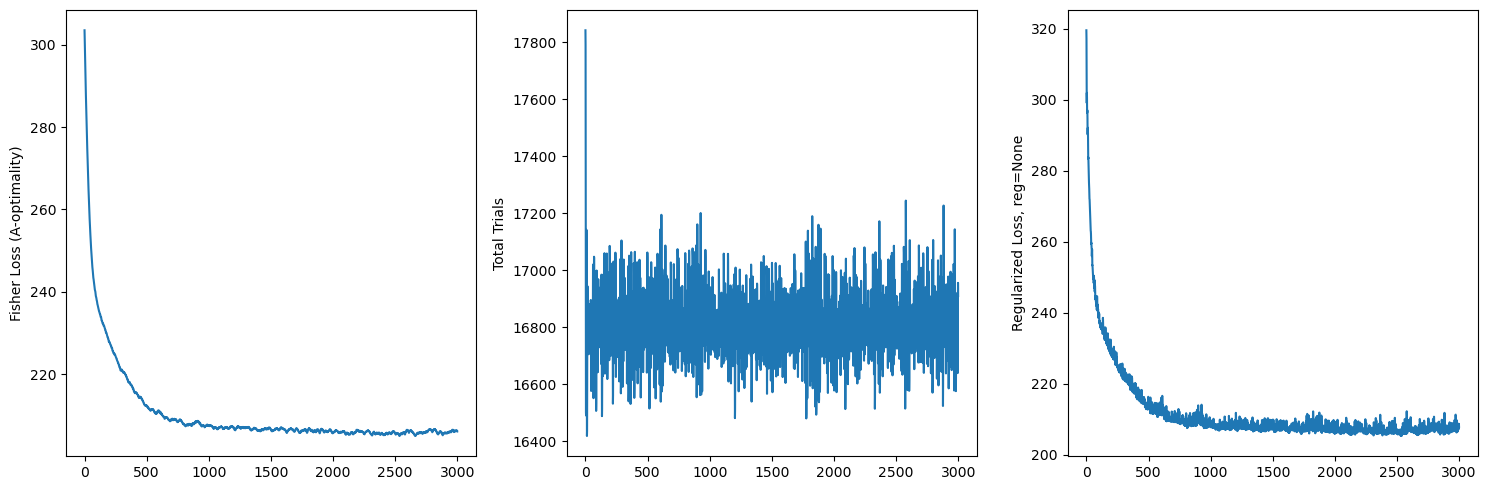

0.01838471403393777 0.029749464551501677


/tmp/ipykernel_1403/2971187439.py:118: RuntimeWarning: invalid value encountered in true_divide
  p_tmp = (p_new * T_new[np.newaxis, :, :] + probs_empirical * T_prev[np.newaxis, :, :]) / ((T_new + T_prev)[np.newaxis, :, :])


Setting up data...
Generating input list...
Fitting dataset...
Calculating Jacobian...
Optimizing trials...
0
(DeviceArray(209.91148, dtype=float32), DeviceArray(17842.508, dtype=float32), DeviceArray(220.9651, dtype=float32), DeviceArray(11.053615, dtype=float32))
1
(DeviceArray(209.0844, dtype=float32), DeviceArray(17791.422, dtype=float32), DeviceArray(219.59966, dtype=float32), DeviceArray(10.515261, dtype=float32))
2
(DeviceArray(208.29025, dtype=float32), DeviceArray(17374.773, dtype=float32), DeviceArray(214.41478, dtype=float32), DeviceArray(6.1245317, dtype=float32))
3
(DeviceArray(207.56488, dtype=float32), DeviceArray(16805.611, dtype=float32), DeviceArray(207.69147, dtype=float32), DeviceArray(0.12658201, dtype=float32))
4
(DeviceArray(206.903, dtype=float32), DeviceArray(16508.432, dtype=float32), DeviceArray(209.90816, dtype=float32), DeviceArray(3.00516, dtype=float32))
5
(DeviceArray(206.2457, dtype=float32), DeviceArray(16500.643, dtype=float32), DeviceArray(209.33295,

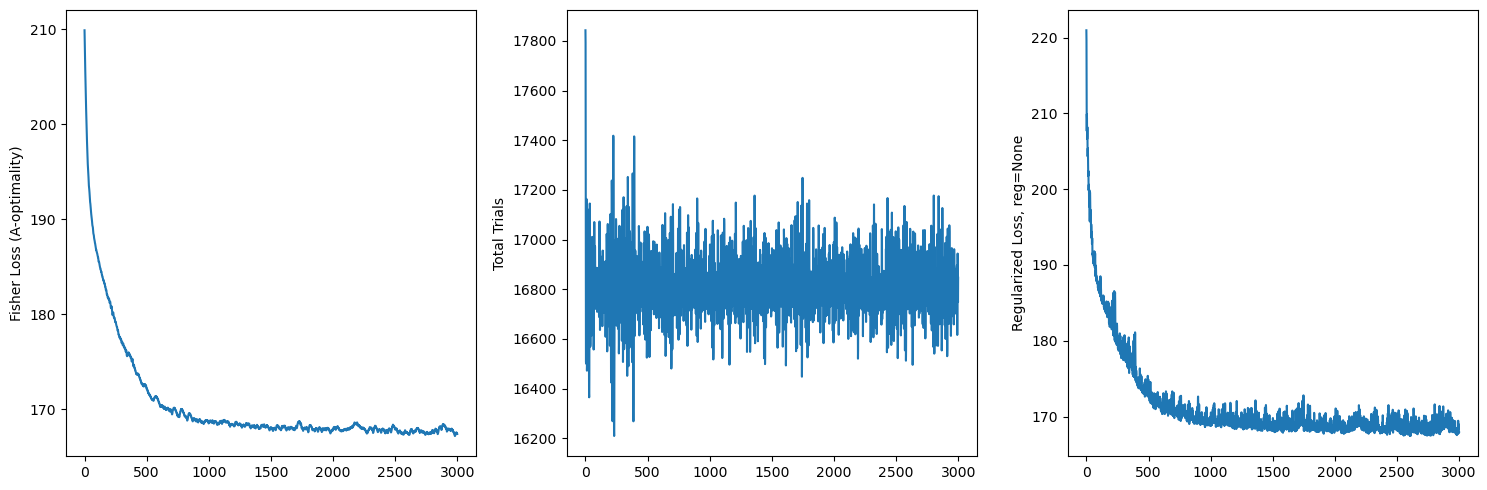

0.01649984902306132 0.02704708392699491


/tmp/ipykernel_1403/2971187439.py:118: RuntimeWarning: invalid value encountered in true_divide
  p_tmp = (p_new * T_new[np.newaxis, :, :] + probs_empirical * T_prev[np.newaxis, :, :]) / ((T_new + T_prev)[np.newaxis, :, :])


Setting up data...
Generating input list...
Fitting dataset...
Calculating Jacobian...
Optimizing trials...
0
(DeviceArray(172.83289, dtype=float32), DeviceArray(17842.508, dtype=float32), DeviceArray(181.92726, dtype=float32), DeviceArray(9.09437, dtype=float32))
1
(DeviceArray(172.27344, dtype=float32), DeviceArray(17791.135, dtype=float32), DeviceArray(180.9224, dtype=float32), DeviceArray(8.648949, dtype=float32))
2
(DeviceArray(171.72754, dtype=float32), DeviceArray(17374.111, dtype=float32), DeviceArray(176.76076, dtype=float32), DeviceArray(5.033222, dtype=float32))
3
(DeviceArray(171.18904, dtype=float32), DeviceArray(16804.168, dtype=float32), DeviceArray(171.28067, dtype=float32), DeviceArray(0.09163105, dtype=float32))
4
(DeviceArray(170.65948, dtype=float32), DeviceArray(16504.24, dtype=float32), DeviceArray(173.16832, dtype=float32), DeviceArray(2.5088384, dtype=float32))
5
(DeviceArray(170.13034, dtype=float32), DeviceArray(16492.621, dtype=float32), DeviceArray(172.73991

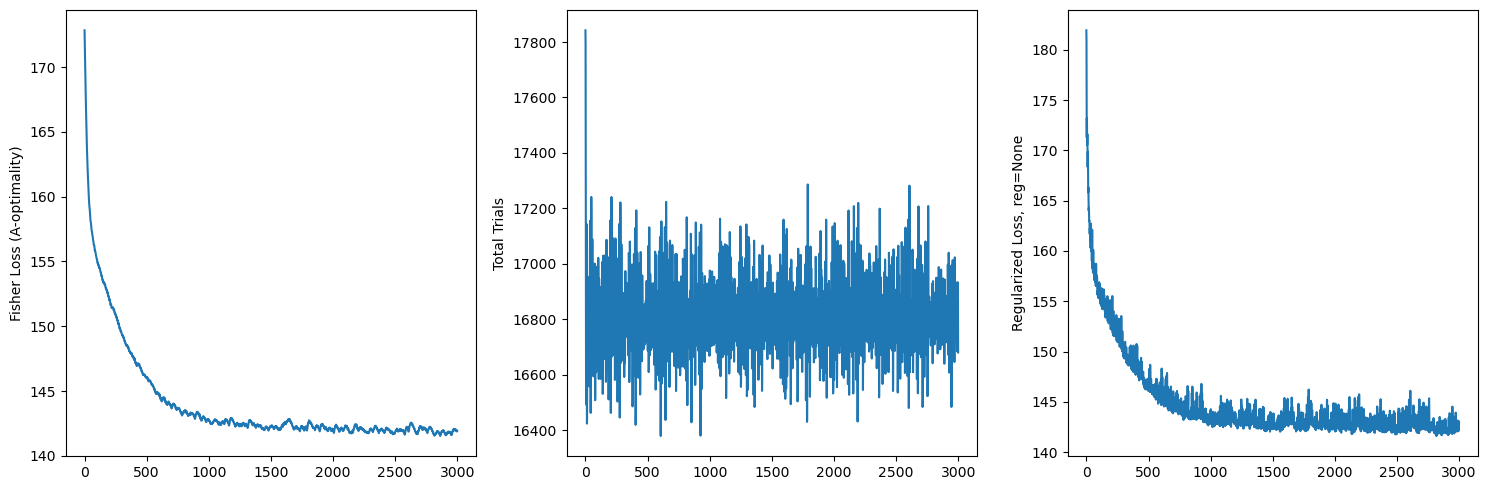

0.014728889740528222 0.025310302047441592


In [8]:
num_iters = 5

T_prev = np.zeros((amps_scan.shape[0], amps_scan.shape[1]), dtype=float)
budget = T_prev.shape[0] * T_prev.shape[1] * 1 #int(total_budget / num_iters)
reg = None # 20, 50
T_step_size = 0.05 # 0.05, 0.01
T_n_steps = 3000    # 5000

init_trials = 5
ms = [1]
disambiguate = True
verbose = True
R2_cutoff = 0
prob_low = 0
min_inds = 0
exploit_factor = 0.8
entropy_samples = 1
trial_cap = 100

for i in range(len(T_prev)):
    T_prev[i][::4] = init_trials

T_prev_uniform = deepcopy(T_prev)

probs_empirical = sample_spikes_array(probs_true_scan, T_prev, NUM_THREADS=24)
probs_empirical_uniform = deepcopy(probs_empirical)

performances = []
performances_uniform = []
num_samples = []
num_samples_uniform = []

iter_cnt = 0
while True:
    if iter_cnt == 0:
        T_new, w_inits_array, t_final, probs_curr, params_curr = fitting.fisher_sampling_1elec(
                                        probs_empirical, 
                                        T_prev, amps_scan,
                                        T_step_size=T_step_size,
                                        T_n_steps=T_n_steps,
                                        verbose=verbose, budget=budget, ms=ms, reg=reg,
                                        return_probs=True,
                                        disambiguate=disambiguate,
                                        R2_cutoff=R2_cutoff,
                                        min_prob=prob_low,
                                        min_inds=min_inds,
                                        exploit_factor=exploit_factor, 
                                        entropy_samples=entropy_samples,
                                        trial_cap=trial_cap)

        performance = get_performance_array(params_true, probs_curr, probs_true_scan)
        performance_uniform = performance

        w_inits_array_uniform = deepcopy(w_inits_array)
        
    else:
        T_new, w_inits_array, t_final, probs_curr, params_curr = fitting.fisher_sampling_1elec(
                                        probs_empirical, 
                                        T_prev, amps_scan,
                                        T_step_size=T_step_size,
                                        T_n_steps=T_n_steps,
                                        verbose=verbose, budget=budget, ms=ms, reg=reg,
                                        return_probs=True,
                                        # t_final=t_final,
                                        w_inits_array=w_inits_array,
                                        disambiguate=disambiguate,
                                        R2_cutoff=R2_cutoff,
                                        min_prob=prob_low,
                                        min_inds=min_inds,
                                        exploit_factor=exploit_factor,
                                        entropy_samples=entropy_samples,
                                        trial_cap=trial_cap)

        
        performance = get_performance_array(params_true, probs_curr, probs_true_scan)

        input_list_uniform = fitting.generate_input_list(probs_empirical_uniform, amps_scan, 
                                                            T_prev_uniform, w_inits_array_uniform, prob_low,
                                                            disambiguate=disambiguate, min_inds=min_inds)

        pool = mp.Pool(processes=24)
        results_uniform = pool.starmap_async(fitting.fit_surface, input_list_uniform)
        mp_output_uniform = results_uniform.get()
        pool.close()

        params_curr_uniform = np.zeros((probs_empirical_uniform.shape[0], probs_empirical_uniform.shape[1]), dtype=object)
        w_inits_array_uniform = np.zeros((probs_empirical_uniform.shape[0], probs_empirical_uniform.shape[1]), dtype=object)
        probs_curr_uniform = np.zeros(probs_empirical_uniform.shape)

        cnt = 0
        for i in range(len(probs_empirical_uniform)):
            for j in range(len(probs_empirical_uniform[i])):
                params_curr_uniform[i][j] = mp_output_uniform[cnt][0]
                w_inits_array_uniform[i][j] = mp_output_uniform[cnt][1]
                
                probs_curr_uniform[i][j] = fitting.sigmoidND_nonlinear(
                                        sm.add_constant(amps_scan[j], has_constant='add'), 
                                        params_curr_uniform[i][j])

                cnt += 1

        performance_uniform = get_performance_array(params_true, probs_curr_uniform, probs_true_scan)
    
    print(performance, performance_uniform)
    
    performances.append(performance)
    performances_uniform.append(performance_uniform)
    
    num_samples.append(np.sum(T_prev))
    num_samples_uniform.append(np.sum(T_prev_uniform))

    iter_cnt += 1

    if iter_cnt > num_iters:
        break

    p_new = sample_spikes_array(probs_true_scan, T_new, NUM_THREADS=24)
    p_tmp = (p_new * T_new[np.newaxis, :, :] + probs_empirical * T_prev[np.newaxis, :, :]) / ((T_new + T_prev)[np.newaxis, :, :])
    T_tmp = T_new + T_prev

    p_tmp = np.nan_to_num(p_tmp, nan=0.5)

    probs_empirical = p_tmp
    T_prev = T_tmp
    
    # random_extra = np.random.choice(len(T_new.flatten()), size=int(np.sum(T_new)), replace=True)
    # T_new_uniform = np.array(np.bincount(random_extra, minlength=len(T_new.flatten())).astype(int).reshape(T_new.shape), dtype=float)
    T_new_uniform = np.ones_like(T_prev_uniform, dtype=float)
    p_new_uniform = sample_spikes_array(probs_true_scan, T_new_uniform, NUM_THREADS=24)

    p_tmp_uniform = (p_new_uniform * T_new_uniform[np.newaxis, :, :] + probs_empirical_uniform * T_prev_uniform[np.newaxis, :, :]) / ((T_prev_uniform + T_new_uniform)[np.newaxis, :, :])
    T_tmp_uniform = T_prev_uniform + T_new_uniform

    p_tmp_uniform = np.nan_to_num(p_tmp_uniform, nan=0.5)

    probs_empirical_uniform = p_tmp_uniform
    T_prev_uniform = T_tmp_uniform

In [9]:
baseline_trials = 20
T_prev_baseline = np.ones_like(T_prev, dtype=float) * baseline_trials

probs_empirical_baseline = sample_spikes_array(probs_true_scan, T_prev_baseline, NUM_THREADS=24)

w_inits_array_baseline = np.zeros((probs_empirical_baseline.shape[0], probs_empirical_baseline.shape[1]), dtype=object)
for i in range(len(w_inits_array_baseline)):
    for j in range(len(w_inits_array_baseline[i])):
        w_inits = []

        for m in ms:
            w_init = np.array(np.random.normal(size=(m, amps_scan[j].shape[1]+1)))
            w_inits.append(w_init)

        w_inits_array_baseline[i][j] = w_inits

input_list_baseline = fitting.generate_input_list(probs_empirical_baseline, amps_scan, T_prev_baseline, w_inits_array_baseline, 0,
                                                    disambiguate=disambiguate, min_inds=min_inds)

pool = mp.Pool(processes=24)
results_baseline = pool.starmap_async(fitting.fit_surface, input_list_baseline)
mp_output_baseline = results_baseline.get()
pool.close()

params_curr_baseline = np.zeros((probs_empirical_baseline.shape[0], probs_empirical_baseline.shape[1]), dtype=object)
w_inits_array_baseline = np.zeros((probs_empirical_baseline.shape[0], probs_empirical_baseline.shape[1]), dtype=object)
probs_curr_baseline = np.zeros(probs_empirical_baseline.shape)

cnt = 0
for i in range(len(probs_empirical_baseline)):
    for j in range(len(probs_empirical_baseline[i])):
        params_curr_baseline[i][j] = mp_output_baseline[cnt][0]
        w_inits_array_baseline[i][j] = mp_output_baseline[cnt][1]
        
        probs_curr_baseline[i][j] = fitting.sigmoidND_nonlinear(
                                sm.add_constant(amps_scan[j], has_constant='add'), 
                                params_curr_baseline[i][j])

        cnt += 1

performance_baseline = get_performance_array(params_true, probs_curr_baseline, probs_true_scan)

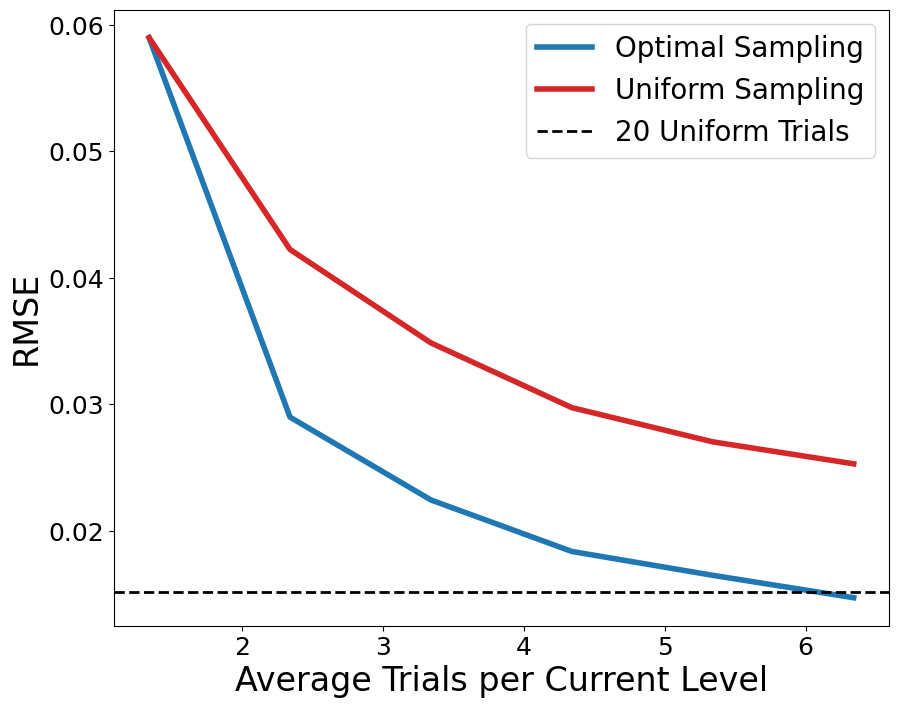

In [10]:
plt.figure(figsize=(10, 8))

plt.plot(np.array(num_samples)/T_prev.shape[0]/T_prev.shape[1], performances, linewidth=4, c='tab:blue', label='Optimal Sampling')
plt.plot(np.array(num_samples_uniform)/T_prev_uniform.shape[0]/T_prev_uniform.shape[1], performances_uniform, linewidth=4, c='tab:red', label='Uniform Sampling')

plt.axhline(performance_baseline, c='k', linestyle='--', linewidth=2, label=f'{baseline_trials} Uniform Trials')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Average Trials per Current Level', fontsize=24)
plt.ylabel(r'RMSE', fontsize=24)
plt.legend(fontsize=20)

plt.savefig(f'single_AL_fakedata_{DATASET}.png', dpi=300)

[[-9.00314507  6.15971845]]
[[-8.35266145  5.88295361]]


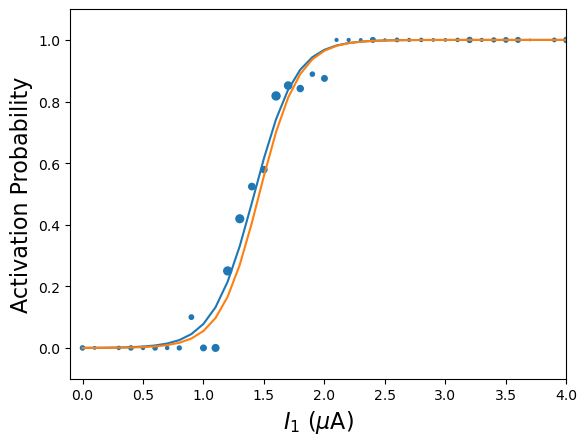

[[-4.59511985  1.96092537]]
[[-4.66222694  2.01923644]]


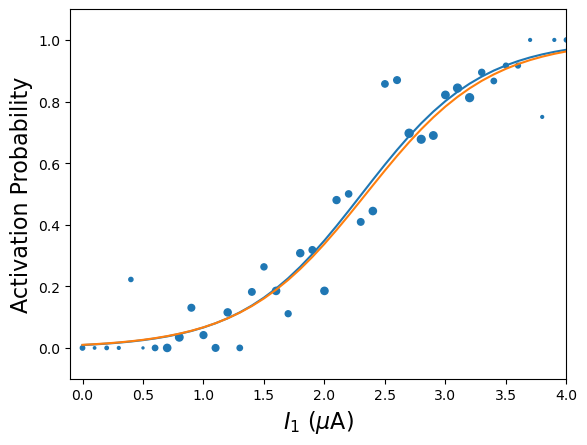

[[-6.18028207  2.51848533]]
[[-6.39737365  2.5991278 ]]


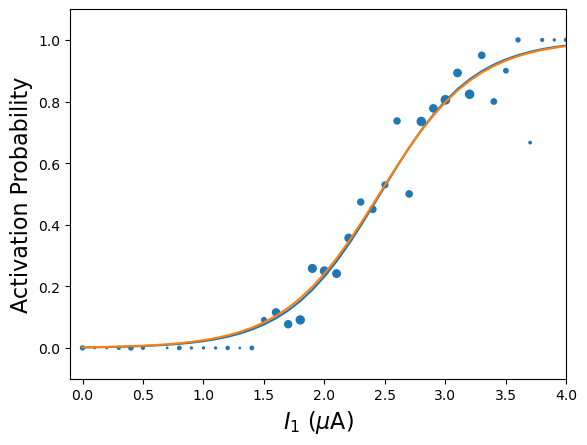

[[-8.0573527   2.30742655]]
[[-8.23213453  2.37140127]]


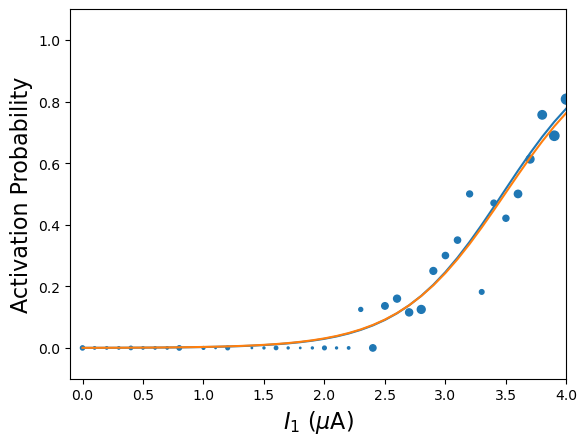

[[-12.44486449  10.        ]]
[[-12.08618793  10.        ]]


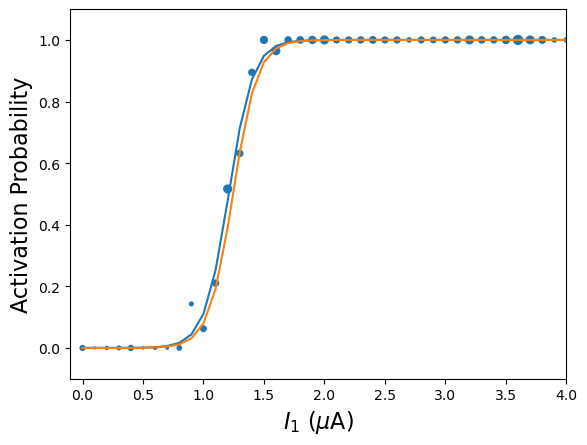

[[-16.10581783   8.53067618]]
[[-13.49749024   7.1511328 ]]


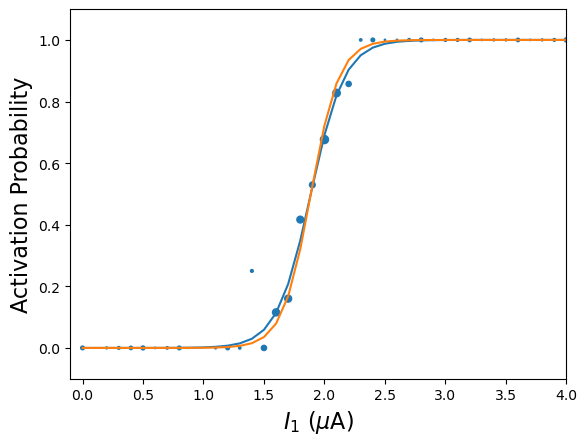

[[-11.70092952   6.52846535]]
[[-12.38774422   7.05527588]]


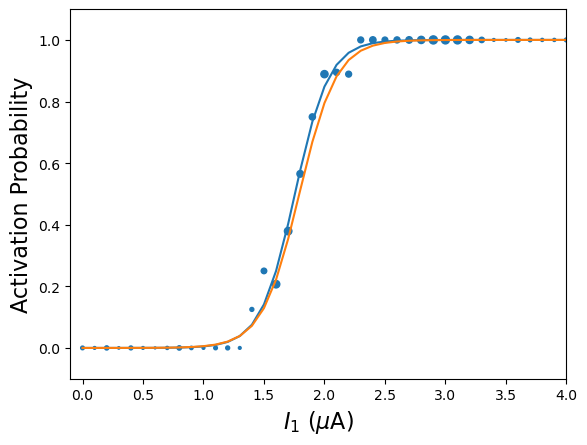

[[-4.59511985  4.15081124]]
[[-4.69365234  4.35535076]]


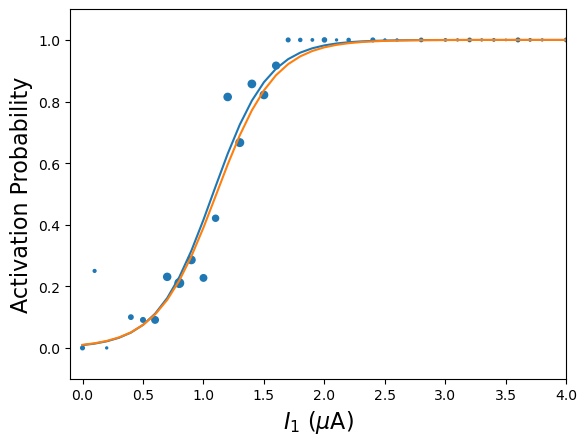

[[-12.11671948   8.04613587]]
[[-12.61527868   8.34104409]]


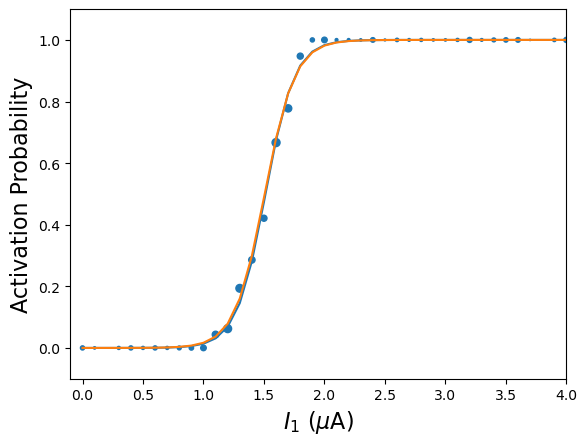

[[-5.39441263  3.0838513 ]]
[[-5.94215657  3.37860169]]


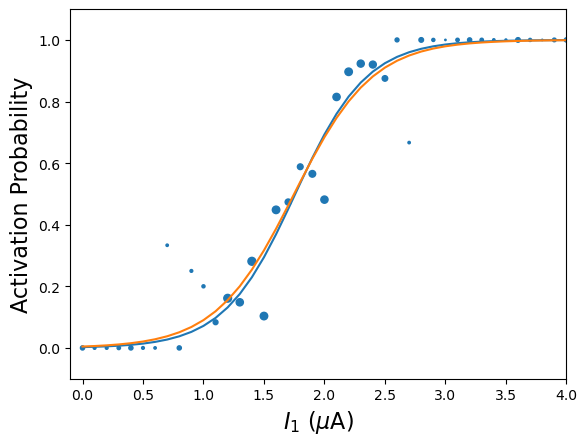

[[-7.41521284  3.78338772]]
[[-6.5346066  3.4208962]]


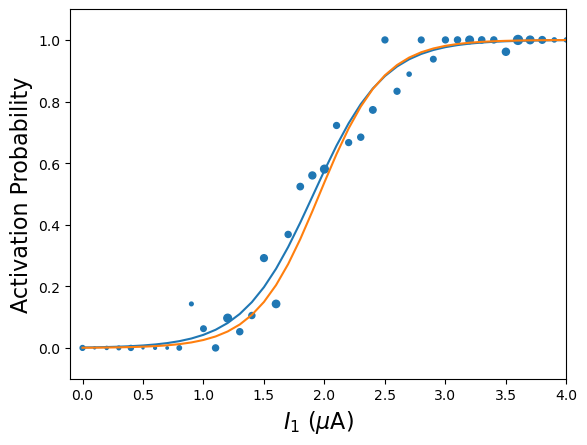

[[-9.68781113  3.48002408]]
[[-9.46695135  3.41381455]]


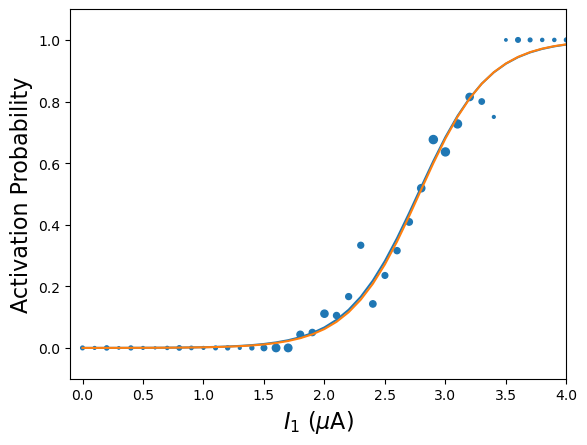

[[-8.66022047  2.65458328]]
[[-8.81406385  2.65518858]]


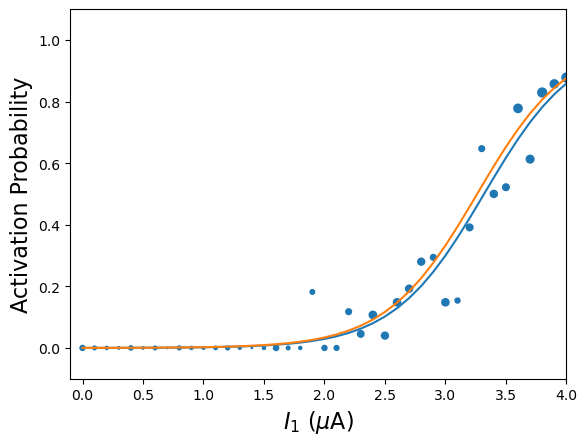

[[-8.55262619  2.90633326]]
[[-8.30832267  2.92009422]]


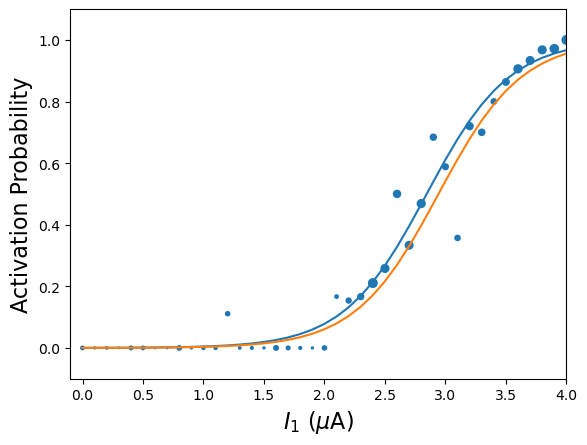

[[-15.71753287   8.37124449]]
[[-17.66281968   9.25896111]]


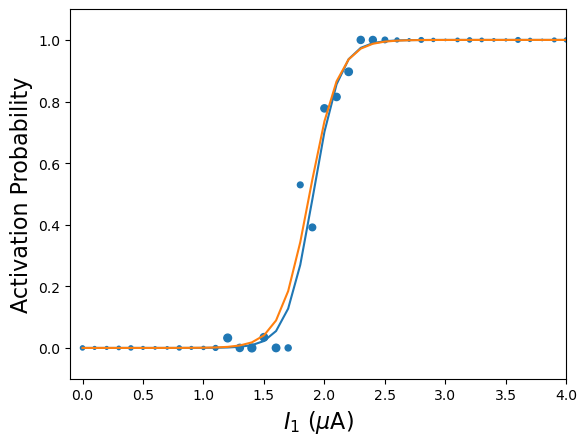

[[-5.56028034  1.69206694]]
[[-5.63323015  1.68352968]]


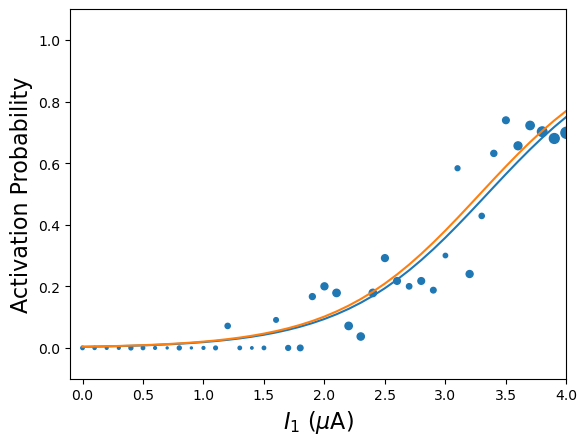

[[-5.89741675  1.64623531]]
[[-5.81099358  1.63092975]]


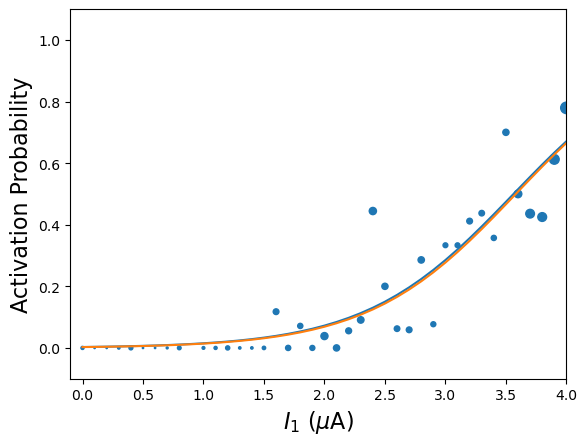

[[-13.83058587   6.78208206]]
[[-14.91941882   7.41656533]]


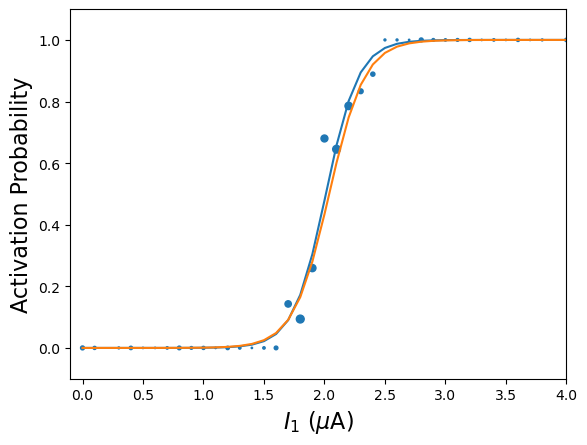

[[-12.51005753   6.39043983]]
[[-13.14898112   6.69196931]]


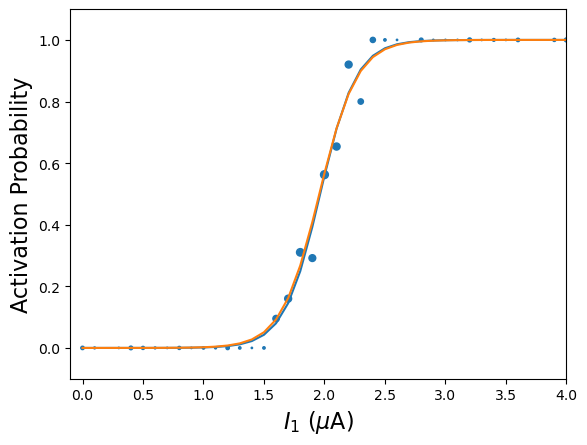

[[-4.59511985  1.03308469]]
[[-4.74741037  1.05571548]]


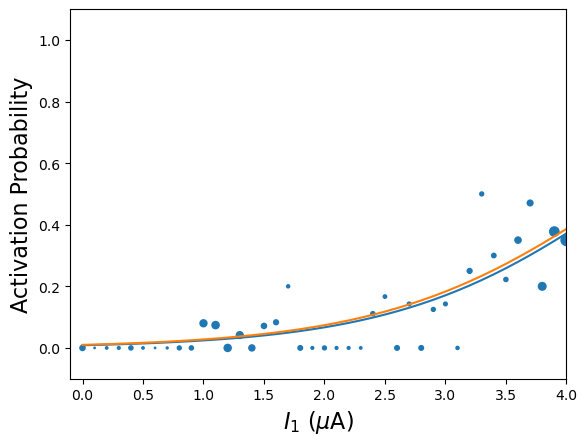

[[-10.61490298   8.586288  ]]
[[-11.47547894   9.4849081 ]]


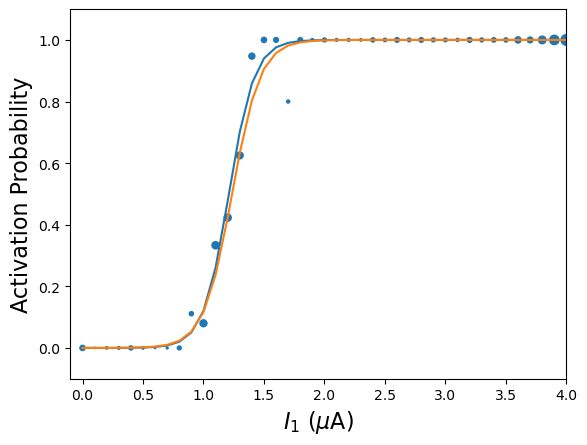

[[-4.59511985  3.90563045]]
[[-4.74472236  4.18951515]]


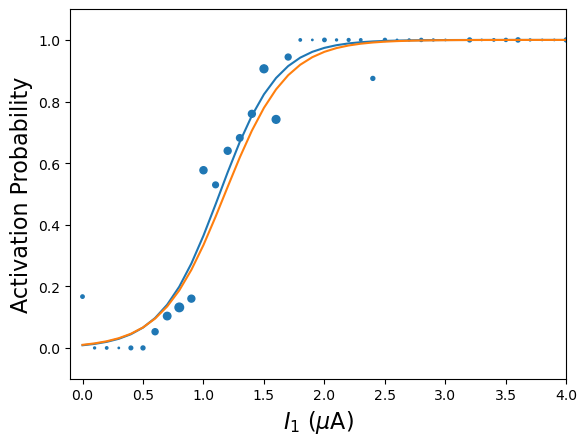

[[-6.96010345  4.66176016]]
[[-7.54796123  4.99890263]]


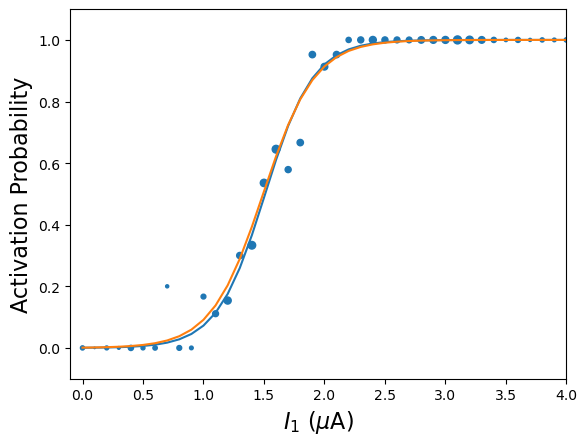

[[-7.0600501   2.17976697]]
[[-7.14590485  2.21599817]]


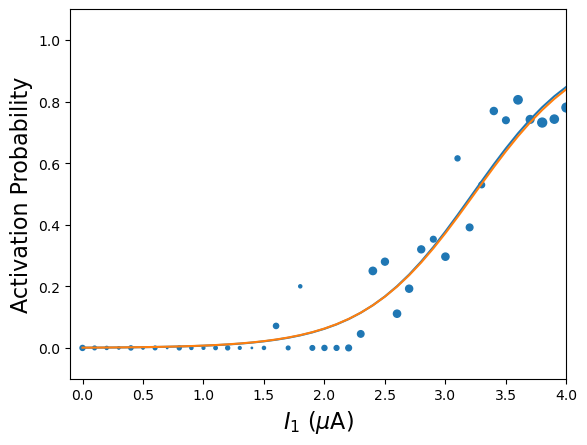

[[-17.33158797   7.85234504]]
[[-17.53138769   7.97892422]]


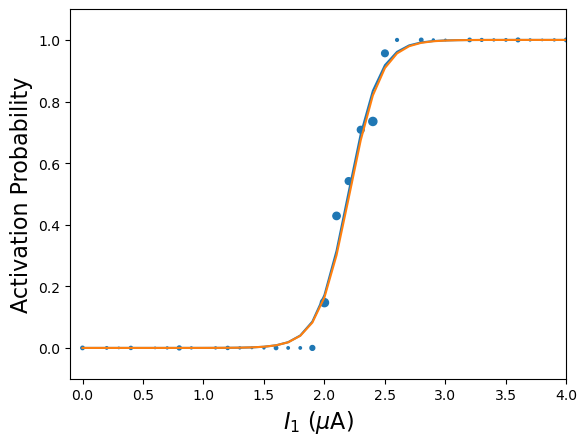

[[-7.89092938  2.33484012]]
[[-7.3227484   2.11482267]]


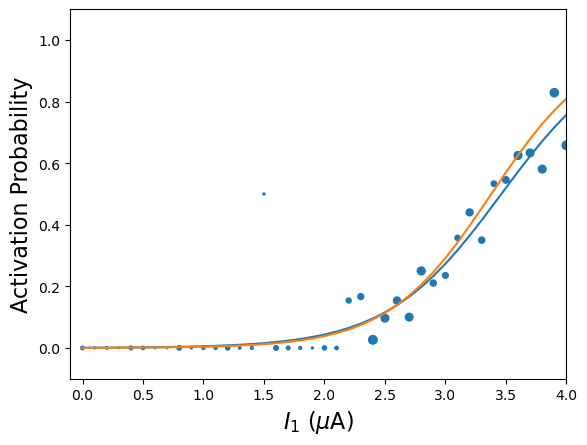

[[-8.37476894  6.45765115]]
[[-8.63521878  6.57655033]]


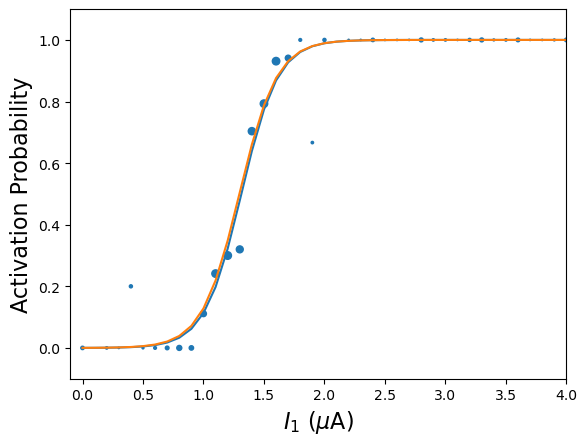

[[-8.78480276  2.72342188]]
[[-7.99548965  2.50924819]]


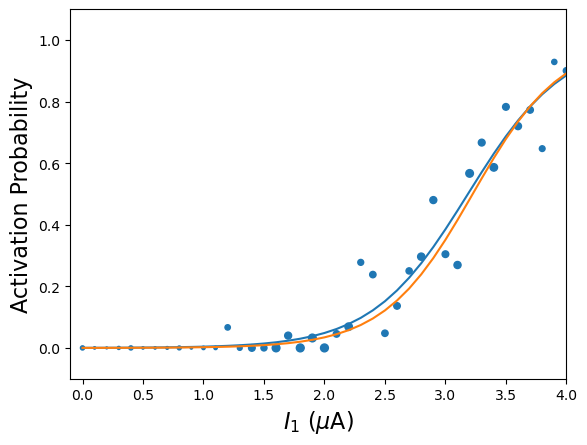

[[-4.59701652  1.96840452]]
[[-4.99519217  2.11796611]]


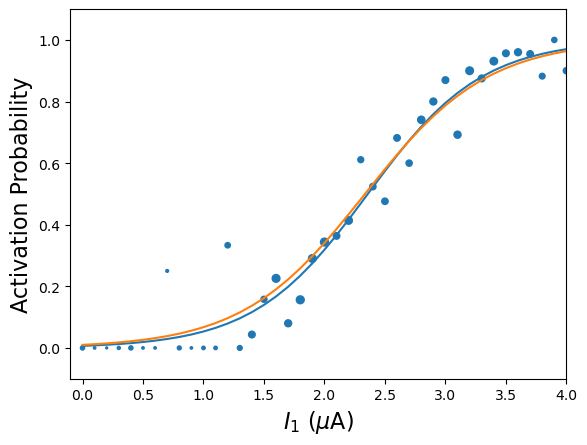

[[-15.43839337   7.13590752]]
[[-14.24789836   6.5488725 ]]


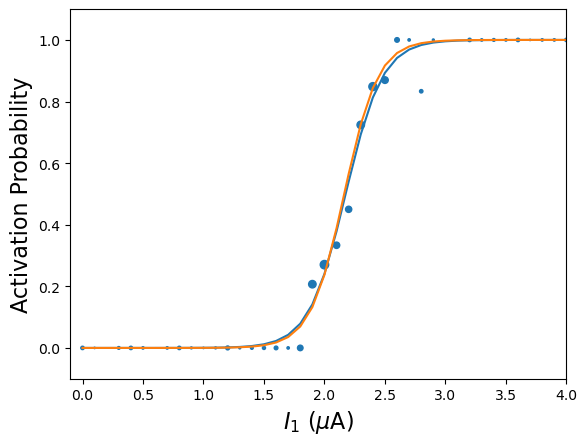

[[-5.91503805  4.00906522]]
[[-5.56076628  3.81556734]]


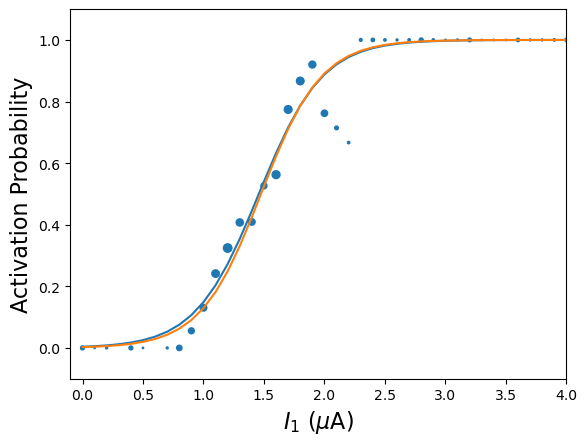

[[-19.69273018   8.24205432]]
[[-18.1385009    7.65940282]]


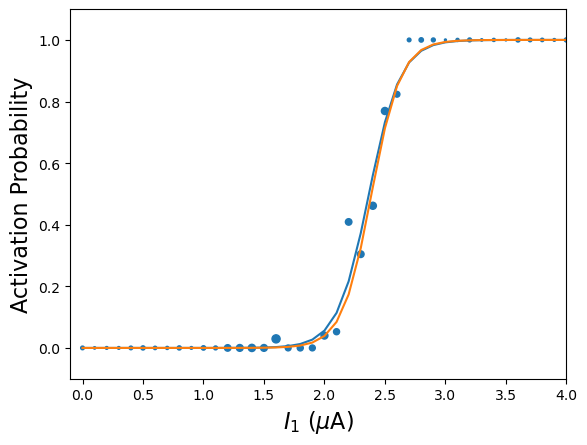

[[-15.23680021   4.18834371]]
[[-17.05232429   4.63669866]]


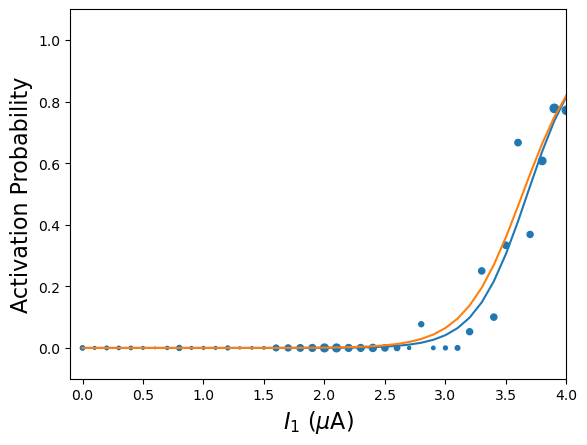

[[-7.37669562  4.20316989]]
[[-7.30124671  4.24666096]]


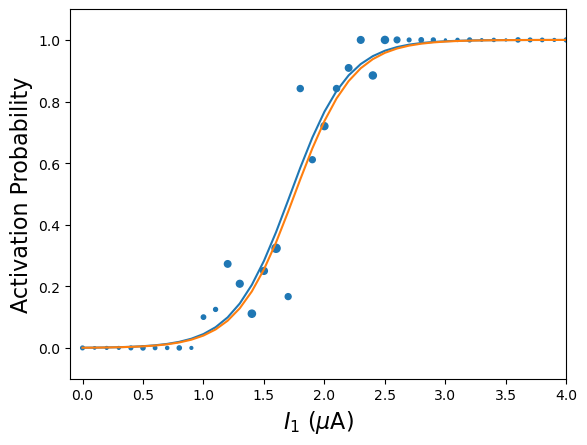

[[-4.59511985  1.57642118]]
[[-4.59511985  1.64344688]]


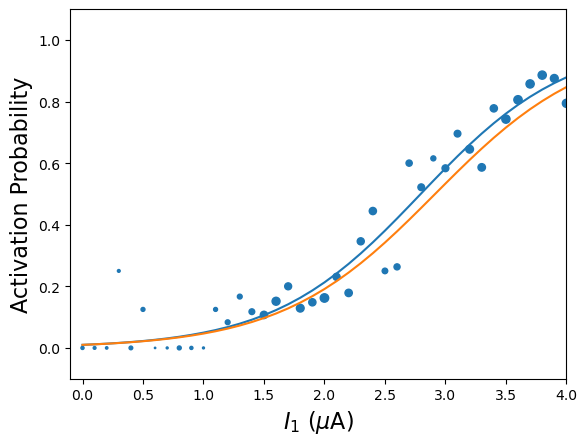

[[-10.2677061    4.82454583]]
[[-10.8509685    5.15780256]]


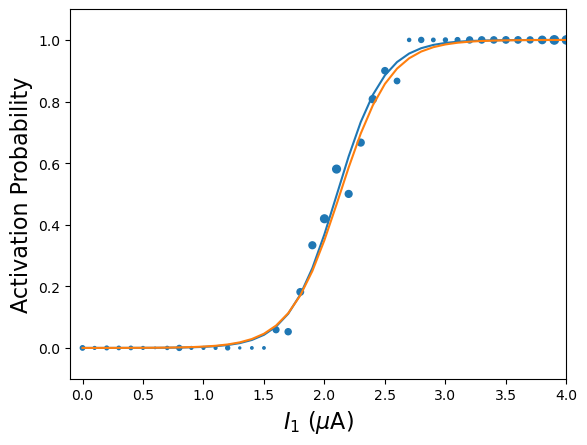

[[-8.39131037  3.21090179]]
[[-7.99024225  3.08106339]]


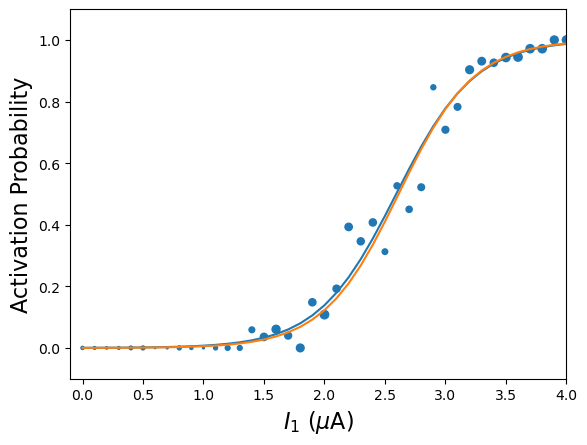

[[-12.84615526   5.15132683]]
[[-15.55354963   6.37307866]]


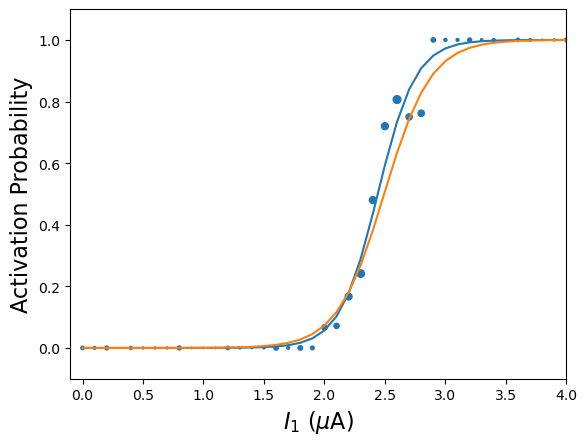

[[-11.45528507   3.9204733 ]]
[[-11.80469258   4.02474374]]


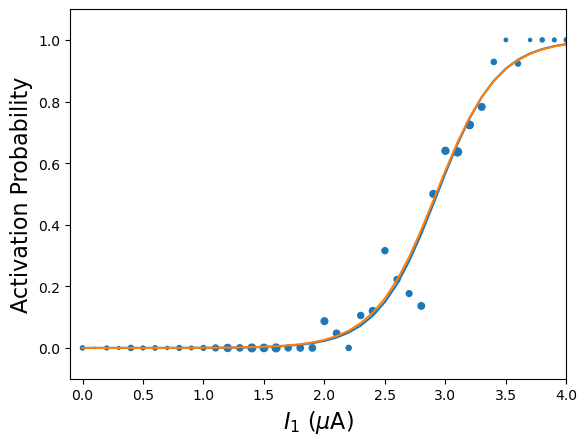

[[-6.66072589  2.64395062]]
[[-6.18065391  2.45861396]]


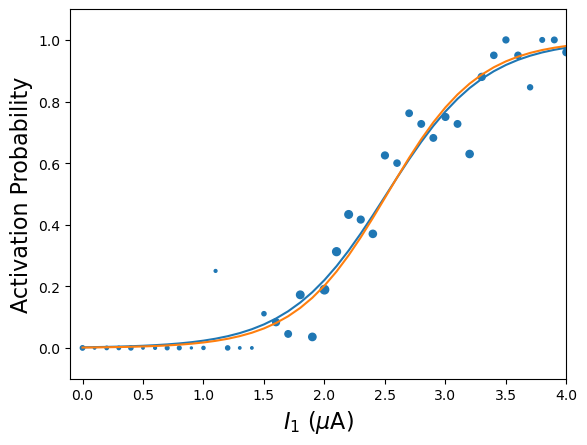

[[-8.52609991  3.13459137]]
[[-8.72643487  3.21055979]]


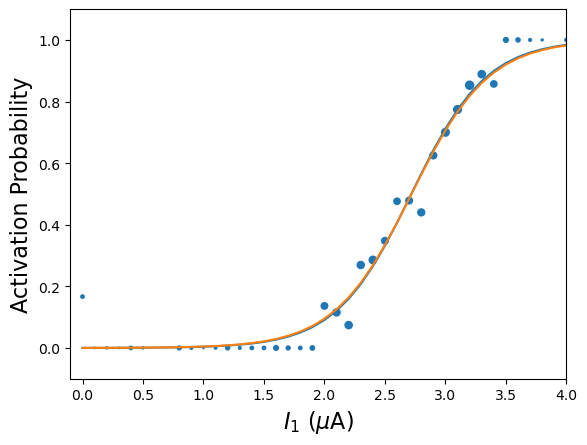

[[-8.07465773  2.55319779]]
[[-9.98186822  3.15977523]]


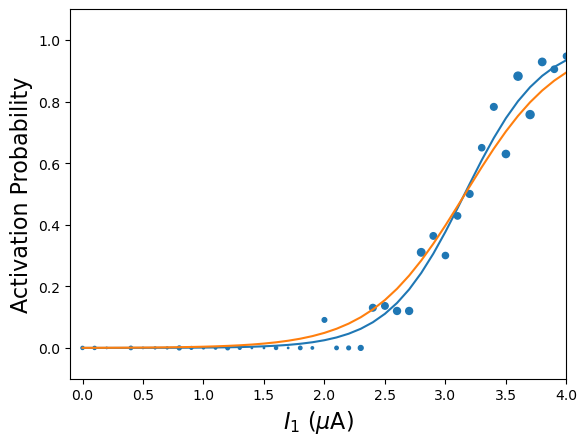

[[-6.61498002  5.05803016]]
[[-7.87879609  5.87330847]]


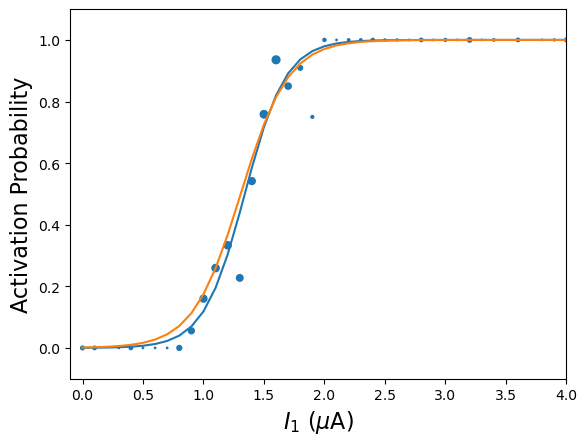

[[-7.24742109  1.98134708]]
[[-8.86119763  2.43420351]]


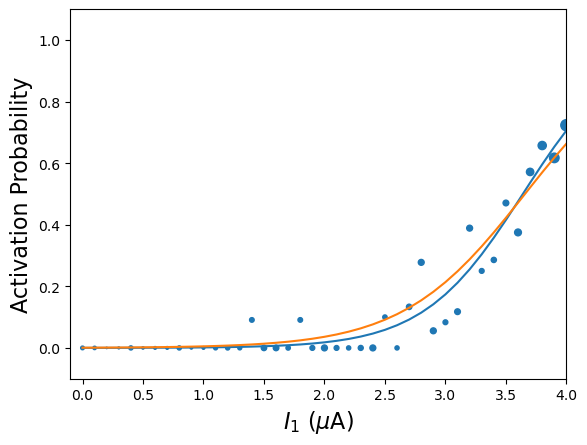

[[-4.59511985  0.9853822 ]]
[[-4.59511985  0.93566797]]


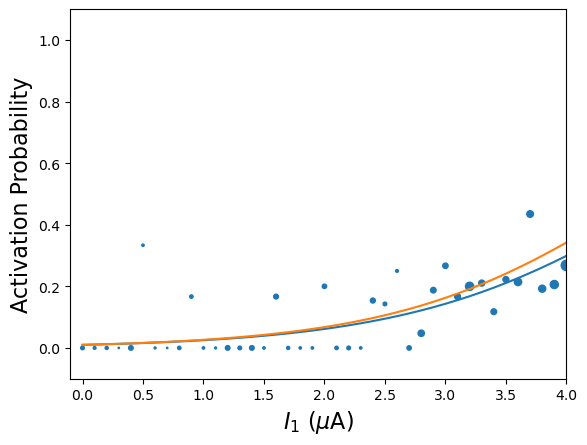

[[-8.9883913   5.93653188]]
[[-8.96897359  5.83981398]]


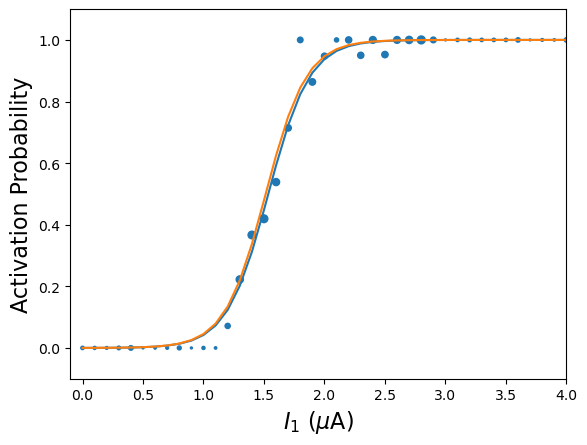

[[-5.57240377  1.72367131]]
[[-5.9616828   1.87079297]]


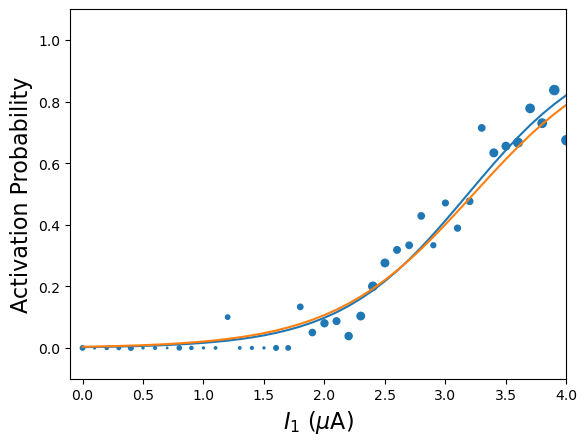

KeyboardInterrupt: Interrupted by user

In [11]:
# CHECK DATASET IF NEEDED

for i in range(len(probs_true_scan)):
    for j in range(len(probs_true_scan[i])):
        if type(params_true[i][j]) != int:

            sampled_inds = np.where(T_prev[j] > 0)[0]

            print(params_true[i][j])
            print(params_curr[i][j])

            fig = plt.figure(0)
            plt.xlabel(r'$I_1$ ($\mu$A)', fontsize=16)
            plt.ylabel('Activation Probability', fontsize=16)
            plt.xlim(-0.1, 4)
            plt.ylim(-0.1, 1.1)
            plt.scatter(amps_scan[j][sampled_inds][:, 0], probs_empirical[i][j][sampled_inds],
                        s=T_prev[j][sampled_inds])
            plt.plot(amps_scan[j][:, 0], probs_curr[i][j])
            plt.plot(amps_scan[j][:, 0], probs_true_scan[i][j])
            plt.show()

            input()